In [97]:
# TODO readme (installation instruction done, add some workshop preview/description)
# TODO preds on train data

# Say hello to machine learning in Python

## Basic machine learning tutorial, using scikit-learn library

### @ PyConPL 2018

# Table of Contents

[1 Preparation of the development environment](#1-Preparation-of-the-development-environment)<br/>
[2 Introduction to Machine Learning](#2-Introduction-to-Machine-Learning)<br/>
[3 Introduction to classification](#3-Introduction-to-classification)<br/>
[4 Introduction to regression](#4-Introduction-to-regression)<br/>
[5 Stand alone project](#5-Project-time)

# 1 Preparation of the development environment

### Dependencies installation

As everyone can have several versions of Python installed in the system, we use somewhat convoluted way of installing packages to add them to the same version of Python interpreter being used to run this notebook.

In [98]:
import sys
!{sys.executable} -m pip install numpy pandas scipy scikit-learn matplotlib

### Imports

A few libraries that will be used during the workshop. <br/>
(please confirm that you can import all of them successfully).

In [99]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

### Some "global" constants

In [100]:
RANDOM_SEED = 42
STARTUPS_DATASET_PATH = './data/startups.csv'
STARTUPS_DATA_DECRIPTION_PATH = './data/startups_description.txt'
ORTHOPEDIC_PATIENTS_DATASET_PATH = './data/orthopedic_patients_2C.csv'  # dunno yet if 2C or 3C will be used

### Utility (visualisation) code

In [101]:
def _make_meshgrid(x, y, h=.02):
    """
    Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def _plot_contours(ax, clf, xx, yy, **params):
    """
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_decision_regions(clf, X, y, title='', x_label='', y_label='', figsize=(6, 6)):
    """
    Plots decision regions for passed as argument classifier and data.
    
    Parameters
    ----------
    clf: a (fitted) classifier
    X: matrix of samples, that will be used as classifier input (note that only 2 first features will be used)
    title: title for a generated plot
    x_label: label for x axis of generated plot
    y_label: label for y axis of generated plot
    figsize: size of generated plot in inches, 2 element tuple (width, height)
    """
    plt.figure(figsize=figsize)
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = _make_meshgrid(X0, X1)
    
    plot_contours(plt.gca(), clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# 2 Introduction to Machine Learning

# 3 Introduction to classification

<b>Note:</b> all concepts, that are present/described here, will be more fully described during workshop and on slides.

### Dataset loading

In [102]:
from sklearn.datasets import load_iris


iris_dataset = load_iris()
print(iris_dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [103]:
X = iris_dataset.data
y = iris_dataset.target

X = X[:, :2]

In [104]:
X[: 5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [105]:
y[: 5]

array([0, 0, 0, 0, 0])

### Train/test split

In [106]:
from sklearn.model_selection import train_test_split

Default split...

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED)


print('Class labels:', np.unique(y_train))
print('Class counts:', np.unique(y_train, return_counts=True)[1])

Class labels: [0 1 2]
Class counts: [35 39 38]


... vs stratified (preserving class distribution) split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED,
                                                   stratify=y)


print('Class labels:', np.unique(y_train))
print('Class counts:', np.unique(y_train, return_counts=True)[1])

Class labels: [0 1 2]
Class counts: [38 37 37]


### Model Fitting

In [109]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Model evaluation

In [110]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)
print('Train acc:', accuracy(y_train, y_train_pred))
print('Test acc:', accuracy(y_test, y_test_pred))

Train acc: 0.8571428571428571
Test acc: 0.6842105263157895


Instead of writing this code by ourselves, we can use scikit help in this case too - it contains implementations of most popular metrics (some of which are much more complex and harder to code than used accuracy).

In [111]:
from sklearn.metrics import accuracy_score


y_test_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_test_pred)

0.6842105263157895

As we are dealing with two features only, we can also check, how the algorithm decision regions look like.

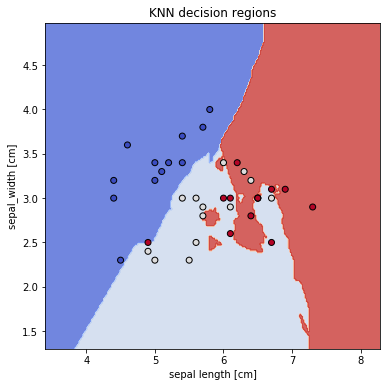

In [112]:
plot_decision_regions(knn_clf, X_test, y_test, 'KNN decision regions', 'sepal length [cm]', 'sepal_width [cm]')

Nearest neighbors classifier is only one of many ML algorithms. Let's use another one, logistic regression, which is a linear classifier to see how well it will tackle the problem, and what the decision boundaries will be!

In [113]:
from sklearn.linear_model import LogisticRegression


log_reg_clf = LogisticRegression()
log_reg_clf.fit(X_train, y_train)
y_train_pred = log_reg_clf.predict(X_train)
y_test_pred = log_reg_clf.predict(X_test)
print('Train acc:', accuracy_score(y_train, y_train_pred))
print('Test acc:', accuracy_score(y_test, y_test_pred))

Train acc: 0.7678571428571429
Test acc: 0.7631578947368421


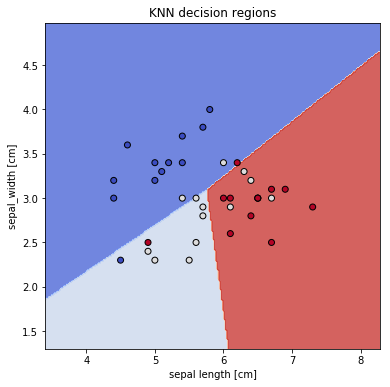

In [114]:
plot_decision_regions(log_reg_clf, X_test, y_test, 'KNN decision regions', 'sepal length [cm]', 'sepal_width [cm]')

### Model hyperparameters

Features of data we use for model training influence it's performance greatly. We will try out in one of following exercises. But besides them, algorithms themselves have also another set of parameters, called hyperparameters, that affect how they work/optimize given problem. 

In [122]:
knn_clf = KNeighborsClassifier(n_neighbors=1)  # default number of neighbors is 5
knn_clf.fit(X_train, y_train)

y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)
print('Train acc:', accuracy(y_train, y_train_pred))
print('Test acc:', accuracy(y_test, y_test_pred))

Train acc: 0.9464285714285714
Test acc: 0.631578947368421


### Exercises
- Explore in more exhaustive way, how the change of k parameter in KNN classifier affects achieved accuracy. Fit the classifier with all possible k values in range [1, 3, 5 ... 51] and check the accuracy. <br/> Bonus: Plot the results you obtained.
- Fit the data using yet another classifier - Decision Tree (located in sklearn.tree). Do you need to change much of a code to test another algorithm?
- Remember how we selected only first two features of Iris dataset after loading? It was done for visualisation purposes, but more features can definitely help us improve our score. Investigate how the different models will perform using data with all features. <br/>Bonus: After that, you can also play with the hyperparameters - try to obtain as high accuracy on test set as possible.

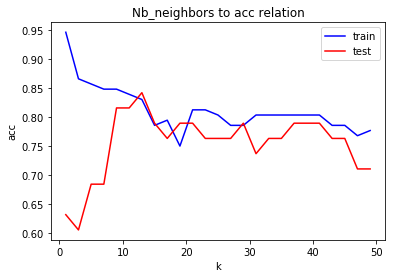

In [125]:
# Ex1 solution (all solutions will be moved to another notebook later)
nb_neighbors = []
train_accuracies = []
test_accuracies = []

for i in range(1, 51, 2):    
    knn_clf = KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(X_train, y_train)
    y_test_pred = knn_clf.predict(X_test)
    y_train_pred = knn_clf.predict(X_train)
    
    nb_neighbors.append(i)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

plt.plot(nb_neighbors, train_accuracies, c='b', label='train')
plt.plot(nb_neighbors, test_accuracies, c='r', label='test')
plt.title('Nb_neighbors to acc relation')
plt.xlabel('k')
plt.ylabel('acc')
plt.legend(loc='upper right')
plt.show()

In [127]:
# Ex2 solution
from sklearn.tree import DecisionTreeClassifier


dec_tree_clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
dec_tree_clf.fit(X_train, y_train)
y_test_pred = dec_tree_clf.predict(X_test)
print('Train acc:', accuracy_score(y_train, y_train_pred))
print('Test acc:', accuracy_score(y_test, y_test_pred))

Train acc: 0.7767857142857143
Test acc: 0.5263157894736842


In [128]:
# Ex3 solution
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)

In [130]:
# basic, without hyperparams tuning
classifiers = {'knn': KNeighborsClassifier(), 'log_reg': LogisticRegression(random_state=RANDOM_SEED), 
               'dec_tree': DecisionTreeClassifier(random_state=RANDOM_SEED)}
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_acc = accuracy_score(y_train, y_train_pred)
    print('{}, train acc: {}, test acc: {}'.format(clf_name, train_acc, test_acc))

knn, train acc: 0.96, test acc: 0.98
log_reg, train acc: 0.95, test acc: 1.0
dec_tree, train acc: 1.0, test acc: 0.98


# 4 Introduction to regression

### Dataset loading

Iris dataset which we've used earlier is available directly in a library and "ready to go". The reality is often not so pleasant, and data comes with many problems, like missing or inconsistent values, that must be handled first (in fact, it often takes most of the time, even 80-90% when working on a project). Fortunately, there are plenty libraries that simplify working with data, i.e. pandas which we will use.

In [132]:
data = pd.read_csv(STARTUPS_DATASET_PATH)

In [139]:
# TODO - write down data description, load and display it here.
data_description = ''
print(data_description)

### Data preparation - data cleaning

TODO - some text/descriptions

In [133]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,123334.88,108679.17,304981.62,California,149759.96
1,120542.52,148718.95,311613.29,New York,152211.77
2,77044.01,99281.34,140574.81,New York,108552.04
3,27892.92,84710.77,164470.71,Florida,77798.83
4,93863.75,127320.38,249839.44,Florida,141585.52


In [134]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,48.000000,48.000000,50.000000,50.000000
mean,74407.441042,121408.986250,211025.097800,112012.639200
std,45223.225037,28599.967316,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,42692.090000,102579.505000,129300.132500,90138.902500
50%,73051.080000,123467.895000,212716.240000,107978.190000
75%,100982.240000,145190.700000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          48 non-null float64
Administration     48 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [136]:
pd.isnull(data).any(axis=1).sum()

2

In [137]:
data.iloc[[12, 43]]

,R&D Spend,Administration,Marketing Spend,State,Profit
12,NaN,NaN,261776.23,New York,129917.04
43,NaN,NaN,45173.06,California,14681.40


In [138]:
print(len(data))
data = data.dropna()
print(len(data))

50
48


### Data preparation - encoding

Problem: we go rid of samples with missing data, but we need our features to be numeric matrix - condition which might not be exactly fulfilled looking at California in state column...

In [140]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [141]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend', 'State']].values
y = data['Profit'].values

In [142]:
from sklearn.preprocessing import LabelEncoder

state_le = LabelEncoder()
state_le.fit(X[:, 3])
X[:, 3] = state_le.transform(X[:, 3])

In [143]:
X[: 5]

array([[123334.88, 108679.17, 304981.62, 0],
       [120542.52, 148718.95, 311613.29, 2],
       [77044.01, 99281.34, 140574.81, 2],
       [27892.92, 84710.77, 164470.71, 1],
       [93863.75, 127320.38, 249839.44, 1]], dtype=object)

In [144]:
state_le.classes_  # keep this cell?
state_le.inverse_transform([0, 1, 2])

C:\Users\ja\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['California', 'Florida', 'New York'], dtype=object)

We got our data but there is a problem: should Florida be greater than New York? What does it eve mean? 

In [147]:
from sklearn.preprocessing import OneHotEncoder

state_ohe = OneHotEncoder()
state_ohe.fit(np.expand_dims(X[:, 3], axis=-1))
state_transformed = np.squeeze(state_ohe.transform(np.expand_dims(X[:, 3], axis=-1)))

In [156]:
# TODO: doesn't like all that squuezes and stuff

<48x3 sparse matrix of type '<class 'numpy.float64'>'
	with 48 stored elements in Compressed Sparse Row format>

### Data preparation - feature scaling

In [ ]:
# TODO (one/two sentences and feature scaling itself)

Now, our data is finally ready to be passed to the model, weee :) <br/> (but you must agree that quite some work was needed to be done first)

### Model fitting

### Model evaluation

### Exercises

TODO - Write down/prepare regression exercises here.

# 5 Project time